# Prediction Affluency Based on YELP Data

- Gregory Rankel: [LinkedIn](https://www.linkedin.com/in/gregory-rankel/)  - [Github](https://github.com/gsrankel)
- Varun Ganti: [LinkedIn](https://github.com/adrianavesa) - [Github](https://github.com/varunganti33)
- Adriana Vesa: [LinkedIn](https://www.linkedin.com/in/adriana-v-67aa3a165/) - [Github](https://github.com/adrianavesa)

## Problem Statement

The financial impact of natural disasters is a growing concern in the world, as we observe a seemingly increasing occurrence of massive fires, floods or hurricanes. Hurricane Sandy, the 2012 October storm, did 19 billion in damage to the New York City area alone. In compact megalopolises like New York City the high concentration of population can make any natural disaster proportionally more dangerous to larger number of people. The more important point is that - even in areas perceived as affluent, there are income disparities amongst close neighborhoods - and deciding with celerity if an area is more or less affluent can have a huge influence in how resources are deployed during disasters.

New Light Technologies Inc. (NLT) is a small business based in Washington, D.C. that provides comprehensive information technology solutions for clients in government, commercial, and non-profit sectors. The company offers a unique range of capabilities from Infrastructure Modernization and Cloud Computing to Big Data Analytics, Geospatial Information Systems, and the Development of Software and Web-based Visualization Platforms. This broad technology expertise enables their customers to leverage existing technology investments - and we have been tasked to asses if the existing data collected by Yelp about the dollar price rating of businesses, can be used to asses the affluence of an area. This information can be further used in emergency situations to gauge the level of damage after a disaster, or the areas where the neediest live snd help should be sent faster. We decided to work on the New York City area as it offers an ample data set - and it reflects well the specificity of megaregions and megalopolises that dot the United States. There are over 237 million people living in these mega regions, and we considered that analyzing New York City would give us a good prototype that can be modified and used in other hyper populated areas too. We have used the specificity of large urban areas in selecting and creating our features - as the lifestyle of the people in the area to be analyzed should inform us on the features we should explore for our models.

We obtained information collected by Yelp about the way they classify the price level (in dollar signs) of businesses in New York City. We will be by using Yelp API for that. We will also download IRS data about New York City and create a metric to measure whether or not certain areas are affluent or not. 

Due to what we are predicting being binary, we will run various classification models during our testing such as Logistic Regression, KNN, CART's, and ADABoost. Our assumption, is that accuracy will be the best metric in determining affluency versus not.

## Executive Summary

We were tasked to gauge the importance of the yelp dollar signs in assessing the affluence of a region.
We have chosen to analyze this on New York City, as it is a large area with enough data, and at the same time, representative for densely populated areas in the United States.
We have acquired the data from the Yelp Fusion API, and we ended up with more than 8,000 data points - in other words - businesses that Yelp classified in accordance to their price - $ - from one dollar signs to four dollar signs.

We have decided to use the IRS provided data for 2017 in order to decide on the affluence of a specific zip code. Each zip code has 6 thresholds of tax payers which gives an average sum of the Adjusted Gross Income (AGI) for each threshold. We have created a metric that reflects the average amount of tax payers who filed in the threshold of an AGI of over 200,000 divided by the total average sum of all the thresholds per zip code. We have then set the rate for this metric in order to assign "affluent" or not "affluent" to be 0.5 - in other words - for zip codes in which over 50 percent of the average AGI per that zipcode is being derived from people who make over 200,000, we deemed that zip code to be affluent.

We have plotted our 8,025 points both separately and on the map of New York City to verify that the distribution of the data we pulled is well balanced.

We have realized early on in our process that using only the $ system might be not enough in order to assess the affluence of a neighborhood, and we have used our knowledge of New York City to engineer several new features that were specific to New York City. We have created a feature that aggregates the total number of businesses in a zip code ("count"). We have used K-means to cluster the city into 8 clusters ("clusters") - a feature that tells us if a zip code has a Trader Joe grocery store in it  ("has_tj"), and a feature that tells us of a zip code has an Equinox gym in it (has_equinox). Whenever possible - local knowledge should be employed in order to improve the features used - and our reasoning was based on knowing the city - and knowing that areas where an Equinox gym is present are more affluent. We used the same reasoning when it came to Trader Joe. At the same time, we decided to keep the city category assigned by Yelp to each specific business in out final features.

## Table of contents:
- [1.4 Acquiring and Preprocessing Data](#Acquiring-and-Preprocessing-Data)
- [1.5 Data Dictionary](#Data-Dictionary)
- [1.6 Loading Libraries](#Loading-Libraries)
- [1.7 Loading Data](#Loading-Data)
- [1.8 EDA](#EDA)
- [1.9 Featured Engineering](#CFeatured-Engineering)
- [1.10 Model Preparation](#Model-Preparation)
- [1.11 Modeling](#Modeling)
- [1.12 Model Selection](#Model-Selection)
- [1.13 Model Evaluation](#Model-Evaluation)
- [1.14 Conclusion](#Conclusion)
- [1.15 Conclusion](#Conclusion)


## Acquiring and Preprocessing Data

We have preprocessed the scrapped and concatenated data in the notebook [Data Collection](./title_preprocessing.ipynb) that can be found in the same folder as this notebook.

## Data Dictionary

|Feature|Type|Description|
|---|---|---|
|**State**|*object*|State|
|**City**|*object*|City|
|**Zip Codes**|*int*|Zip Code |
|**Latitude**|*float*|Latitude |
|**Longitude**|*float*|Longitude|
|**ID**|*object*|Unique ID of each Data point|
|**Name**|*object*|Store/Restaurant Name|
|**Review Count**|*int*|Number of reviews
|**Categories**|*object*|Category of each point|
|**Rating**|*float*|Average rating of each point|
|**Price**|*int*|Amount of $ signs of each point|
|**High Value**|*float*|Average Adjusted Gross Income of people who made over 200,000 per Zip Code|
|**AGI Sum**|*float*|Sum of the Total Average Income per threshold per Zip Code|
|**Aff Perc**|*float*|Rate of Affluency per Zip Code (High Value /AGI Sum)|
|**Count**|*int*|Count of Restaurants in particular Zip Code|


## Loading Libraries

Libraries are used in python to automate functions in order to clean data, engineer data, and model data

In [144]:

##Import libraties for cleaning

import pandas as pd
import datetime as dt
import time
import requests
import numpy as np
import math
from ast import literal_eval
##Import modeling libraries

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import silhouette_score

#Import metrics 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

## Loading Data

We decied to scrape yelp business data based on the 4 closer bouroughs, Manahattan, Queens, Bronx, Brooklyn. 
In addition, to extact more data points we decided to query from specific addresses and yelp's api is smart
enough to pull from the surrounding areas. This will allow us to get more data and more precise data. 

In [145]:
##Use pandas to read csv. File Path ./data
df_midtowneast = pd.read_csv('../data/midtownqueensvg.csv')
df_lower_manhattan = pd.read_csv('../data/lower_manhattan.csv')
df_brooklyn = pd.read_csv('../data/brooklyn.csv')
df_brooklyn_queens = pd.read_csv('../data/brooklyn_queens.csv')
df_uppernyc = pd.read_csv('../data/uppernyc.csv')

## EDA

### YELP EDA

Drop Unnamed Columns in brooklyn. Will be better for merging

In [146]:
##Use drop on columns, axis = 1(columns)
df_brooklyn = df_brooklyn.drop('Unnamed: 0', axis =1)

Concat all 3 data frames into one big data frame. 

In [147]:
##use pandas concat to add everything
df_yelp = pd.concat([df_midtowneast, df_lower_manhattan, df_brooklyn, df_brooklyn_queens, df_uppernyc])

Drop all duplicates

In [148]:
##Drop method
df_yelp.drop_duplicates('id', inplace=True)

Check for Nulls

In [149]:
##isnull(sum) method to check nulls
df_yelp['price'].isnull().sum()

1169

Drop rows with null prices. We are worried abot the data that has price ratings based on user input. No value means no data. We cannot assume its a cheap restaurant or cannot fill with median or mean

In [150]:
##Use drop method
df_yelp = df_yelp.dropna(subset = ["price"])

Map Price to numeric values. This will be of use when measuring affluency as stated in our problem statement. We are concerned with the price rating per zip code

In [151]:
##map function to change categoricals into ordinals
df_yelp['price'] = df_yelp['price'].map({'$': 1, '$$': 2, '$$$': 3, '$$$$': 4})

Check Which Zip codes have NAN values

In [152]:
##isin method to check nans
df_yelp[df_yelp['zip_codes'].isin(['NaN'])]

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,zip_codes
1746,BilbRcNQXKmcBFvLm4gxAQ,halal-cart-queens-2,Halal Cart,https://s3-media1.fl.yelpcdn.com/bphoto/Bq_MTq...,False,https://www.yelp.com/biz/halal-cart-queens-2?a...,3,"[{'alias': 'foodstands', 'title': 'Food Stands'}]",5.0,"{'latitude': 40.7488639529741, 'longitude': -7...",[],2,"{'address1': '74 St 37th Ave', 'address2': '',...",NaN,NaN,2129.853970,NaN
1799,jZzbV6SRt9FXdCoziNv5xw,elmhurst-green-market-queens,Elmhurst Green Market,https://s3-media1.fl.yelpcdn.com/bphoto/yW3gl0...,False,https://www.yelp.com/biz/elmhurst-green-market...,4,"[{'alias': 'farmersmarket', 'title': 'Farmers ...",4.0,"{'latitude': 40.7454635299775, 'longitude': -7...",[],2,{'address1': '41st Ave between 80th & 81st St'...,NaN,NaN,1611.572779,NaN
1814,sdJR2FH3Yj3yE-X-ShEnlQ,chilis-queens,Chili's,https://s3-media1.fl.yelpcdn.com/bphoto/7GSL-V...,False,https://www.yelp.com/biz/chilis-queens?adjust_...,27,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",2.0,"{'latitude': 40.7140007, 'longitude': -73.8299...",[],2,"{'address1': 'Atlas Park', 'address2': '', 'ad...",NaN,NaN,1777.430525,NaN
1839,aAAHxvIGFi3fqPy_XZmz6g,jim-beam-suite-new-york,Jim Beam Suite,https://s3-media2.fl.yelpcdn.com/bphoto/Z-pfCK...,False,https://www.yelp.com/biz/jim-beam-suite-new-yo...,15,"[{'alias': 'sportsbars', 'title': 'Sports Bars...",2.5,"{'latitude': 40.8294545983504, 'longitude': -7...",[],3,"{'address1': 'Macombs Dam Bridge', 'address2':...",NaN,NaN,2104.279311,NaN


We researched for nan values on yelp to see where these restaurants where located. We can also use google maps to locate where these restuarants are on the map. No need to drop values when we have outside resources to confirm the zipcodes of nan values

In [153]:
##use loc method to identify nan zipcodes and fill them value
df_yelp.loc[df_yelp['id'] == 'BilbRcNQXKmcBFvLm4gxAQ', 'zip_codes'] = 11372
df_yelp.loc[df_yelp['id'] == 'jZzbV6SRt9FXdCoziNv5xw', 'zip_codes' ] = 11372
df_yelp.loc[df_yelp['id'] == 'sdJR2FH3Yj3yE-X-ShEnlQ', 'zip_codes'] = 11372
df_yelp.loc[df_yelp['id'] == 'v1aO9kQuRKq90xxq_qujxA','zip_codes'] = 11372
df_yelp.loc[df_yelp['id'] == 'aAAHxvIGFi3fqPy_XZmz6g','zip_codes'] = 10451

Check if is closed is False, aka the restaurants must be open. 

In [154]:
##unique values for column
df_yelp['is_closed'].unique()

array([False])

All restaurants are open.

 We want to parse out from location the cities and state. Cities is a another way to group and classify an area by affluency. Cities is an umbrella to the zipcodes, where the data becomes more percise. Percision is key when preparing for disasters, especially in New York where neighborhoods are divese and clustered

Below is a function that parses out the string and keys from the data frame column location

The code below is adopted from NYC(2) project

In [155]:
##This function takes in a string and is able to index it by column name. 

def get_keys_from_sting_dict(string, keys):
 
    if len(string) == 0:
        return None
    dic = literal_eval(string)
    out = {}
    for key in keys:
        out[key] = dic.get(key)
    return out

We can drop location because we have the information from location

In [156]:
##map and extract string from keys and string

location = "location"
keys = ["city", 'state']
zips_and_cities = df_yelp[location].map(lambda string: get_keys_from_sting_dict(string, keys))

for key in keys:
    df_yelp[key] = [pair[key] for pair in zips_and_cities]
    
df_yelp.drop(columns=[location], inplace = True)

We want to parse out from coordinates with longitude and lattitude. Longitude and Lattidue is a another way to group and classify an area by affluency. Longitude and Lat is a little more percises than zipcodes, where the data becomes more percise. Percision is key when preparing for disasters, especially in New York where neighborhoods are divese and clustered

Below is a function that parses out the string and keys from the data frame the coordinates section

The code below is adopted from NYC(2) project

In [157]:
##map and extract string from keys and string
coordinates = "coordinates"
coord_keys = ["latitude", "longitude"]
lat_and_long = df_yelp[coordinates].map(lambda string: get_keys_from_sting_dict(string, coord_keys))

for key in coord_keys:
    df_yelp[key] = [pair[key] for pair in lat_and_long]

df_yelp.drop(columns=[coordinates], inplace = True)

We want to parse out the categories for busineses. This will allow us to get what types or businesses are in affluent or non affluent ares

In [158]:
def convert_string_dict_to_string(string, key):
    '''Returns a string of a string-link dictionary given extraction keys'''
    return ",".join([dic[key] for dic in literal_eval(string)])

df_yelp["categories"] = df_yelp["categories"].map(lambda s: convert_string_dict_to_string(s,"alias"))

We decided to order the location features from less percision to more percision. As you can see state is the less percise and lat/long are the most percise. As stated in our problem statement, percision is key when it comes to location. Price is based on the business and is going to be used later to measure affluency

In [159]:
##select the most features in a list
features = ['state', 'city','zip_codes','latitude', 'longitude','id', 'name', 'review_count', 'categories', 
        'rating','price']

In [160]:
##assign features to new data frame
df_yelp = df_yelp[features]

In [161]:
##check for nulls
df_yelp['zip_codes'].isnull().sum()

0

In [162]:
##changetype to integer
df_yelp['zip_codes'] = df_yelp['zip_codes'].astype(int)

In [163]:
##change type to string
df_yelp['zip_codes'] = df_yelp['zip_codes'].astype(str)

Ensure that the zip codes are 5 digits

In [164]:
##string matching to see 5 digits
df_yelp = df_yelp[df_yelp.zip_codes.str.match("\d{5}")]

Change zipcode column type from object to int

In [165]:
df_yelp['zip_codes'] = df_yelp['zip_codes'].astype('int64')

We decided to group all the data by zip codes. One zip code can have many businesses so we want to count the amount of businesses based on dollar amount. This is a part of the eda process to determine which zipcodes have the highest frequency of businesses

In [166]:
##illustate pivot table group by zipcodes with values as id and we want the agg function as count
df_count_zips = df_yelp.set_index('zip_codes')
pivoted = pd.pivot_table(df_count_zips, index='zip_codes', columns=['price'], values='id', aggfunc="count",fill_value=0)
flattened = pd.DataFrame(pivoted.to_records())

df_count_zips = flattened.rename(columns={'1':'yelp_dollar_1','2':'yelp_dollar_2','3':'yelp_dollar_3','4':'yelp_dollar_4'})
df_count_zips['Total_Business'] = df_count_zips['yelp_dollar_1'] + df_count_zips['yelp_dollar_2'] +  df_count_zips['yelp_dollar_3'] + df_count_zips['yelp_dollar_4']

We want to keep zipcodes that have over a therhsold of amount of businesses. We decided to keep the zipcodes with over 20 businesses. 

In [167]:
##filter out by total 20 businesses
df_yelp_zips = df_count_zips[df_count_zips['Total_Business'] > 20]

sort vslurd by highest total amount of businesses

In [168]:
##sort mrethod
df_yelp_zips = df_yelp_zips.sort_values('Total_Business', ascending = False)

### IRS EDA

As a means of defining allfuency, we gathered the information from [IRS Website](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2017-zip-code-data-soi) and pulled the State, Zip Code, Adjusted Gross Income Stub, and Adjusted Gross Income columns from the Data Set. We believed Adjusted Gross Income (AGI) would be a good metric to use as this is Taxable Income, which is the total income that someone would make, less Standard/Itemized Deductions that an individual would take in their Tax Return. After tax income we thought we be a better measure due to it weighing everyone on a more even scale granted that hihger people do have more taxes then lower people. We then define affluency on if 50% of more of the average income of a certain zipcode is being derived from people who make more than 200k. With the data we have pulled, AGI stub 5 is the threshold of people who make more than 200k and is the average AGI of all those people. After we extracted those values for each zipcode, we then summed up the average of all the AGI amounts per AGI stub to get a total average AGI based on the 6 tiers per zipcode. We then divided the 200k tier from the total which then gave us our 'Affluent %' in which we will use to determine whether or not an area is affluent or not. This will then become our Y-variable on what we want to predict on.

In [169]:
##pandas to read file
agi = pd.read_csv('../data/2017IRS.csv')

In [170]:
##printsout top 5 rows
agi.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,1,802640,474470,99850,216600,717050,44090,...,0,0,64680,53602,700940,1803125,698100,1796343,2860,4917
1,1,AL,0,2,499070,218590,137460,129760,448190,26230,...,0,0,77660,118725,419640,1175607,416180,1165352,4250,8894
2,1,AL,0,3,268590,89780,134440,38280,241060,14160,...,0,0,67820,156752,201030,560461,197060,547812,5440,13482
3,1,AL,0,4,170880,32180,124070,11660,154120,7980,...,0,0,48440,141721,121930,396526,118460,383588,3160,12369
4,1,AL,0,5,229870,22810,196990,5540,208380,11120,...,50,19,91100,465160,138250,588068,130970,529001,8430,55564


We are looking to assemble a list of all the zipcodes that we have in our yelp dataframe. We can use a set to order the list which will make it easier to locate

In [171]:
#zip list through yelp dataframe 'zipcode' column
yelp_zip = list(set(df_yelp['zip_codes']))

We then pulled all the neccessary columns that we need to determine aflluency. Per the Data Dictionary on the IRS site, column 'A00100' is the column for Adjusted Gross Income.

In [172]:
#We determined that these are the only necessary columns that we need
#as we are defining afflucne by AGI
agi = agi[['STATE', 'zipcode', 'agi_stub', 'A00100']]

In [173]:
agi.head()

,STATE,zipcode,agi_stub,A00100
0,AL,0,1,10467448
1,AL,0,2,17977581
2,AL,0,3,16502473
3,AL,0,4,14817087
4,AL,0,5,31131390


We then wanted to loop the yelp zip codes that we pulled above through the IRS dataframe and pull the AGI stubs that had the value 6 as these are the values of the average aAGI for people who had an AGI over 200k as well as pull the sum of all of the AGI's for all the various thresholds.

In [174]:
## modified code from NY project 2
high_values = [] #collect all the high values assembled in a list
sum_values = [] #collect the total sum of the average AGI per threshold for each zipcode
zips_in_irs = [] #collect list of all zipcodes that were pulled from IRS Dataset
unidentified_zips= [] # list of allzipcodes that were in the yelp zip and not IRS Dataset
for zips in yelp_zip:
    try:
        high_values.append(list(agi.loc[(agi['zipcode'] == zips) &(agi['agi_stub'] == 6),['A00100'][0]])[0])
        sum_values.append(list(agi.loc[(agi['zipcode'] == zips),['A00100']].sum())[0])
        zips_in_irs.append(zips)
    except:
        unidentified_zips.append(zips)
        pass
    

ensure that all values pulled are the same length to be put in a Dataframe

In [175]:
##print out values
print (len(high_values))
print(len(sum_values))
print(len(zips_in_irs))

92
92
92


Check for unidentified zip cods

In [176]:
unidentified_zips

[10270,
 10271,
 10279,
 10281,
 10286,
 11371,
 10020,
 10041,
 10080,
 11121,
 10103,
 10111,
 10112,
 10120,
 10121,
 10154,
 10158,
 10166,
 10168,
 10169,
 10175,
 10176,
 10177,
 11249]

With these missing zipcodes, we will look how many missing data points there are

In [177]:
agi.isnull().sum()

STATE       0
zipcode     0
agi_stub    0
A00100      0
dtype: int64

We decided to drop the missing datapoints in our data as we deemed that it would not havfe a major impact on our model based on the rate of points being dropped being ~1% of ur data

In [178]:
agi.dropna(inplace = True)

In [179]:
agi.shape

(166537, 4)

With the data that we pulled, we will now make a new DataFrame with the IRS Data and calculate affluency.

In [180]:
irs_df = pd.DataFrame(high_values)
irs_df.rename(columns = {0:"high_value"}, inplace= True)
irs_df["agi_sum"] = sum_values
irs_df['zip_codes'] = zips_in_irs
irs_df

,high_value,agi_sum,zip_codes
0,673987,921774,10280
1,1389188,1472965,10282
2,138928,924696,83501
3,406468,1304009,10301
4,236994,1089205,10308
...,...,...,...
87,1729183,2648560,11231
88,79773,574471,11232
89,126049,1375259,11233
90,55406,956073,11237


Feature engineer affulency percentage column which will help us determine our affluency. We created a new column within the DataFrame 'aff_perc' which takes our 'high_value' column and divdes it by the 'agi_sum'column.

In [181]:
##setting new column with division of df columns
irs_df['aff_perc'] = irs_df['high_value']/ irs_df['agi_sum']

We show that affluency is determined by a neighborhood where 50% of the average summed AGI is determined by people who average agi is > 200k.

In [182]:
## seeing how many affluent neighborhoods we calculated
(irs_df['aff_perc'] >.5).value_counts()

False    59
True     33
Name: aff_perc, dtype: int64

Save new IRS datafram to be uploaded later

In [183]:
##read csv
irs_df.to_csv('irs_data.csv', index=False)

We will now join our yelp dataframe with the new irs dataframe based on zipcode

In [184]:
#We merged the two tables on a left join
df = pd.merge(left = df_yelp, 
         right = irs_df,
              how='left',
        on ='zip_codes')

Develop a count for the zipcode per businss id

In [185]:
df.isnull().sum()

state             0
city              0
zip_codes         0
latitude          0
longitude         0
id                0
name              0
review_count      0
categories        0
rating            0
price             0
high_value      159
agi_sum         159
aff_perc        159
dtype: int64

In [186]:
df.dropna(inplace = True)

In [187]:
df['count'] = df.groupby('zip_codes')['zip_codes'].transform('count')
df

,state,city,zip_codes,latitude,longitude,id,name,review_count,categories,rating,price,high_value,agi_sum,aff_perc,count
0,NY,New York,10017,40.751130,-73.973470,7EaiwMVaNdQibSs0yYkE5Q,Sushi Yasuda,2114,japanese,4.0,3,5233774.0,5902708.0,0.886673,149
1,NY,New York,10017,40.751647,-73.972949,7iY35991NhQ1AShJZCNZgA,Sakagura,1781,japanese,4.0,3,5233774.0,5902708.0,0.886673,149
2,NY,New York,10019,40.761854,-73.979363,xEnNFXtMLDF5kZDxfaCJgA,The Halal Guys,9296,"foodstands,mideastern,halal",4.0,1,5785799.0,7220520.0,0.801299,137
3,NY,New York,10022,40.756301,-73.970370,c3eMI4_o4dPDDhPV_ibBYQ,Ess-a-Bagel,3549,"bakeries,bagels,delis",4.0,1,10952261.0,12031917.0,0.910267,284
4,NY,New York,10016,40.749930,-73.977460,oTkzgr7hzOAdlP99Auj3GQ,Momosan Ramen & Sake,1623,"ramen,tapasmallplates",4.0,2,6400951.0,8331163.0,0.768314,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6810,NY,New York,10017,40.751610,-73.970690,SyQSAyd2ij6st3oAurb6XA,Curry-Ya,29,japanese,3.5,2,5233774.0,5902708.0,0.886673,149
6811,NY,New York,10021,40.766357,-73.953715,awtyJFgknmtZmSK3AgToRw,Sant Ambroeus Coffee Bar at Sotheby's,17,"desserts,cafes",4.0,2,13074443.0,14303821.0,0.914052,140
6812,NY,New York,10017,40.750429,-73.969146,8M6IYVT57FhtFosK34cpxg,Delegates Dining Room,27,"tradamerican,gourmet",3.5,2,5233774.0,5902708.0,0.886673,149
6813,NY,New York,10065,40.764686,-73.966583,td-ANnbKeuQ0Z-XwWgxWaA,Starbucks,57,coffee,3.0,2,9612120.0,10451654.0,0.919675,108


Map affluency to 1 if its greater than .5 and 0 if not/

In [188]:
df['affluent'] = df['aff_perc'].map(lambda ttp: 1 if ttp >= .5 else 0 )

When running through before submission, had error with original data as some points were lost. The back up file shown here is original datapoints for presentation

In [189]:
df = pd.read_csv('../data/datadict.csv')

### Graph EDA

Create a pivot table grouped by zipcode and price to illustrate price versus aff_perc and agi_sum

In [190]:
df_zipcode = df.pivot_table(index = ['zip_codes', 'price']
                           ).reset_index()

df_zipcode.head()

,zip_codes,price,aff_perc,affluent,agi_sum,clusters,count,has_equinox,has_tj,high_value,latitude,longitude,rating,review_count
0,10001,1,0.711868,1,2785807.0,6.862069,175,1,0,1983127.0,40.750295,-73.990563,4.189655,556.655172
1,10001,2,0.711868,1,2785807.0,6.968504,175,1,0,1983127.0,40.749050,-73.990662,3.885827,567.944882
2,10001,3,0.711868,1,2785807.0,7.000000,175,1,0,1983127.0,40.748957,-73.995040,3.777778,619.222222
3,10001,4,0.711868,1,2785807.0,7.000000,175,1,0,1983127.0,40.753670,-73.995490,3.500000,523.000000
4,10002,1,0.343110,0,2489499.0,4.000000,171,1,1,854172.0,40.717381,-73.991001,4.192982,452.596491


Plot out the top 10 most affluent zip codes

In [192]:
df_top10 = df.groupby('zip_codes')['aff_perc'].mean().sort_values(ascending = False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

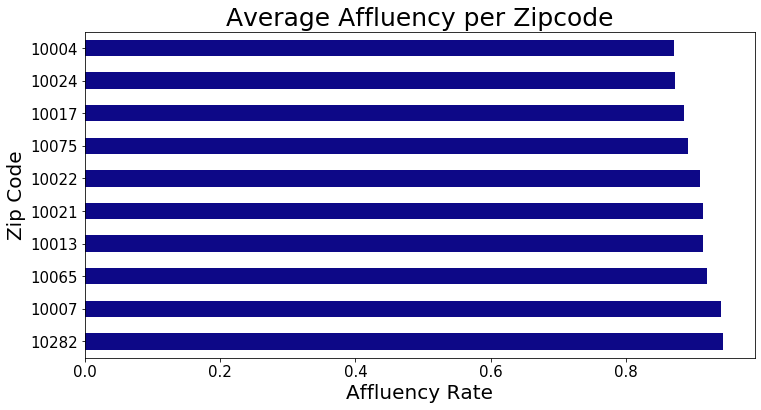

In [193]:
plt.figure(figsize=(12,6))
df_top10.sort_values(ascending = False).plot(kind = 'barh', cmap = 'plasma')
plt.title('Average Affluency per Zipcode',size = 25)
plt.xlabel('Affluency Rate',fontsize=20)
plt.ylabel(('Zip Code'),fontsize=20)
plt.tick_params(labelsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

We see here the top ten most affluent zip codes and what we discovered here was that these were all zip codes located within the manhattan area. The most affluent zip code (10282) is located in Tribeca whihc is notorious for being a more wealth neighborhood and as we examined the other locations, it followed the trend of being located in known affluent areas within New York City.

In [194]:
df_top5 = df_zipcode[['zip_codes', 'aff_perc']].sort_values('aff_perc', ascending = False)
df_top5.reset_index(drop=True, inplace=True)
df_5 = df_top5.sort_values(by = 'aff_perc', ascending= False).head(10)
df_5

,zip_codes,aff_perc
0,10282,0.943124
1,10282,0.943124
2,10007,0.941041
3,10007,0.941041
4,10007,0.941041
5,10007,0.941041
6,10065,0.919675
7,10065,0.919675
8,10065,0.919675
9,10065,0.919675


We wanted to then look at a scatter plot of our data based on longitude and latitude. We expected that when plotting it it on these axis’s, it should represent an accurate picture of the New York City area. When plotted, the picture did accurately represent NYC, however, we were also able to pinpoint various outliers of our data as shown below. We were then able to drop these various data points to give us points that more accurately measure the geographical region we are trying to analyze.

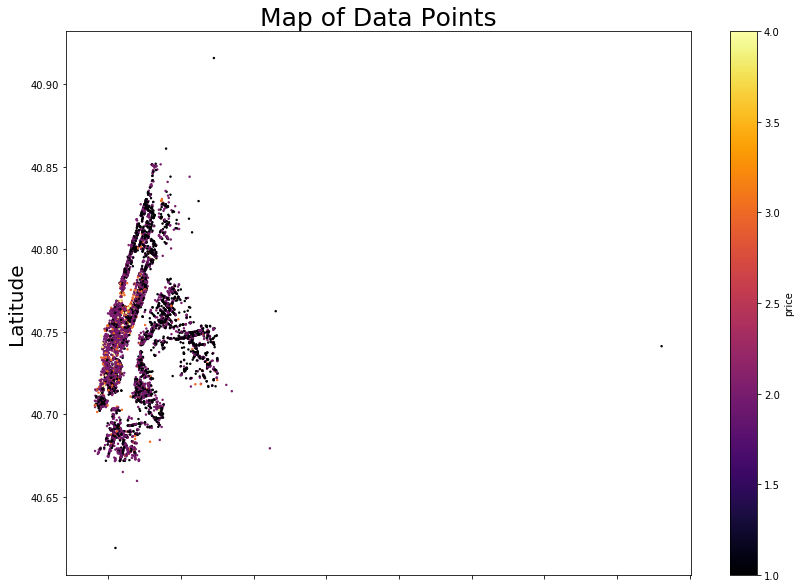

In [195]:
#create scatter plot on x axis being longitude and y axis being latitude
df.plot(kind="scatter", x= 'longitude', y='latitude', c="price",
         cmap="inferno", figsize=(14, 10), s=2)
plt.title('Map of Data Points',size = 25)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel(('Latitude'),fontsize=20);

Drop values and identify outliers that are not in geographical range

In [196]:
#loop through and extract index and points that we defined not in or geopgraphical range
for i in range(0,6542):
    if df.iloc[i]['longitude'] >-73.8:
        df.drop(df.index[i], inplace = True)
    elif df.iloc[i]['latitude'] > 40.90 or df.iloc[i]['latitude'] < 40.65:
         df.drop(df.index[i], inplace = True)

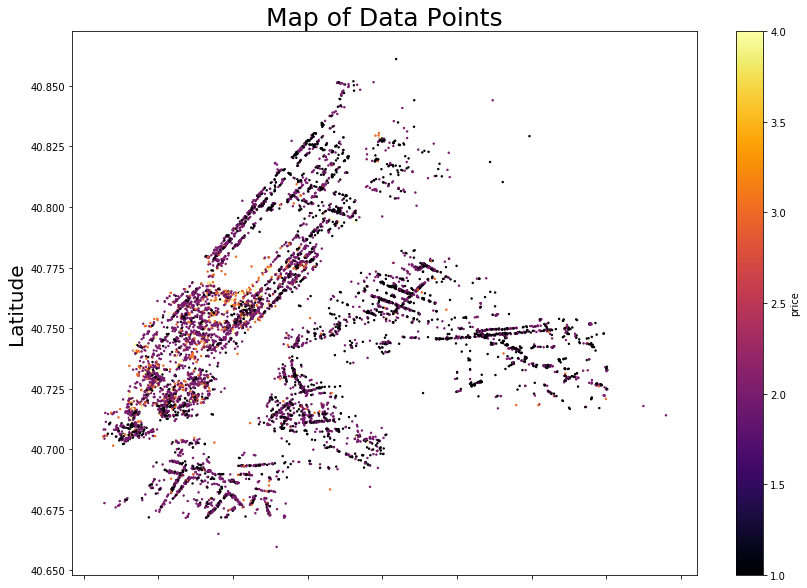

In [197]:
# Replot to see outliers have been removed
df.plot(kind="scatter", x= 'longitude', y='latitude', c="price",
         cmap="inferno", figsize=(14, 10), s=2)
plt.title('Map of Data Points',size = 25)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel(('Latitude'),fontsize=20);

This map repersents the data points we pulled from the yelp api, which illustrates the map of new york. 
As one can see, we were able to gather very specific points. This map will help us find the proper clusters for each area of new york. This map is a good check to see if we gathered sufficient data points and a good big picture of new york.

## Featured engineering 

For Featured Engineering, we addded 3 new columns : 
1. has_tj
1. has_equniox
1. clusters


Based on subject knowledge information and living in New York, we know that Equinox gym is an upper class gym located in more falutent area to attract a more wealthy customer. Similar with Trader Joes, Trader Joes has locations in well populated and upperclass areas that have a lot of foot traffic and is also located in upper class areas. We determined that these would be a good factor in determining affluency of an area.

Per each invidiual site webites, we extracted the zipcodes per location of both Trader Joes and Equinox Gym Locations

In [198]:
trader_joe = [10023, 10002, 10003, 10016, 10010, 10009, 10013, 10025]
equinox = [10019, 10007, 10005, 10281, 10012, 11201, 10002, 10014, 11021, 10014, 10003, 10011, 10010, 11211, 10016, 10001, 10036, 10175]

In [199]:
#created columns for each zipcode that has a Trader Joes mapping 1 if it does and 0 if it doesnt
df['has_tj'] = df['zip_codes'].map(lambda has_it: 1 if has_it in trader_joe else 0)

In [200]:
#created columns for each zipcode that has a Equinox mapping 1 if it does and 0 if it doesnt
df['has_equinox'] = df['zip_codes'].map(lambda has_it: 1 if has_it in equinox else 0)

In [201]:
df.columns

Index(['state', 'city', 'zip_codes', 'latitude', 'longitude', 'id', 'name',
       'review_count', 'categories', 'rating', 'price', 'high_value',
       'agi_sum', 'aff_perc', 'count', 'affluent', 'has_tj', 'has_equinox',
       'clusters'],
      dtype='object')

We then wanted to find the optimal clusters based on longitude and latitude so that we can divide part of the NYC Area. We will use the elbow method here, which will show us based on intertia and silhouette score, to pick how many clusters we will use. Elbow method is the point where the score breaks and there isnt much change between the next cluster.

In [202]:
#define our variables to be clustered on
geo = df[['longitude', 'latitude']]

In [203]:
# create a loop for range 2-30 clusters, so that for each k variable, it will give us a silhouette scores
# that we then were able to appened to the empty score list
scores = []
for k in range(2,31):
    cl = KMeans(n_clusters=k, random_state = 100)
    cl.fit(geo)
    inertia = cl.inertia_
    sil = silhouette_score(geo, cl.labels_)
    scores.append((k, inertia, sil))

In [204]:
#create a dataframe for us to then view scores and see both side by side
kmean_df = pd.DataFrame(scores, columns = ['k', 'inertia', 'sil'])
kmean_df.head(15)

,k,inertia,sil
0,2,11.443176,0.434884
1,3,7.013777,0.450436
2,4,4.970084,0.435619
3,5,3.735434,0.458675
4,6,2.886576,0.468912
5,7,2.151854,0.503517
6,8,1.716491,0.494306
7,9,1.544101,0.468358
8,10,1.422245,0.453463
9,11,1.293826,0.449195


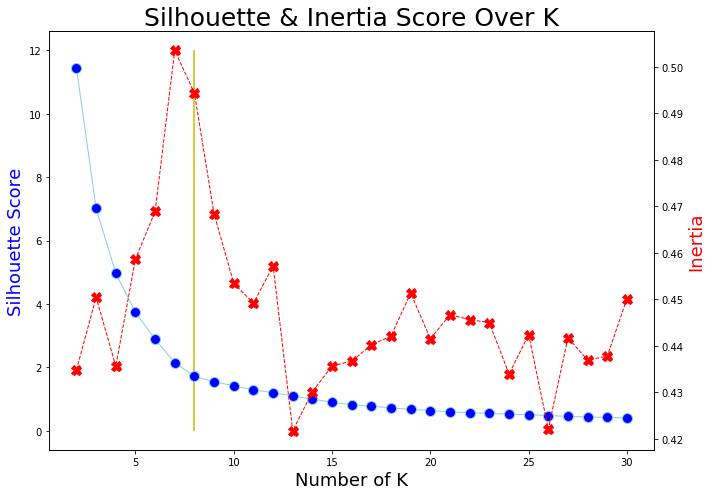

In [205]:
#plot both scores against eachother on same graph and then have a horizantal line to show where the elbow
# point is and determine the proper cluster for our mapping
plt.figure(figsize = (10,7))
plt.plot(kmean_df.k, kmean_df.inertia, marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=1)
plt.title("Silhouette & Inertia Score Over K",  fontsize= 25)
plt.ylabel("Silhouette Score", color = "Blue", fontsize= 18)
plt.xlabel("Number of K", color = "Black", fontsize= 18)
plt.vlines(x = 8,
           ymin = 0,
           ymax = 12,
           color = 'y',
           linestyle = '-')
plt.twinx()
plt.plot(kmean_df.k, kmean_df.sil, marker='X',markerfacecolor='red', markersize=10, color='red', linewidth=1, linestyle='dashed')
plt.ylabel("Inertia", color = "red", fontsize= 18)
plt.tight_layout()

After reviewing all the scores in our kmeans dataframe as well as visually being able to see the graph of the silouette scores and intertia against each other, it was determined that a K of 8 will be the optimal point for us to use. 

In [206]:
km = KMeans(n_clusters = 8)
km.fit(geo)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [207]:
#will no add the clusters to the dataframe
df['clusters'] = km.labels_

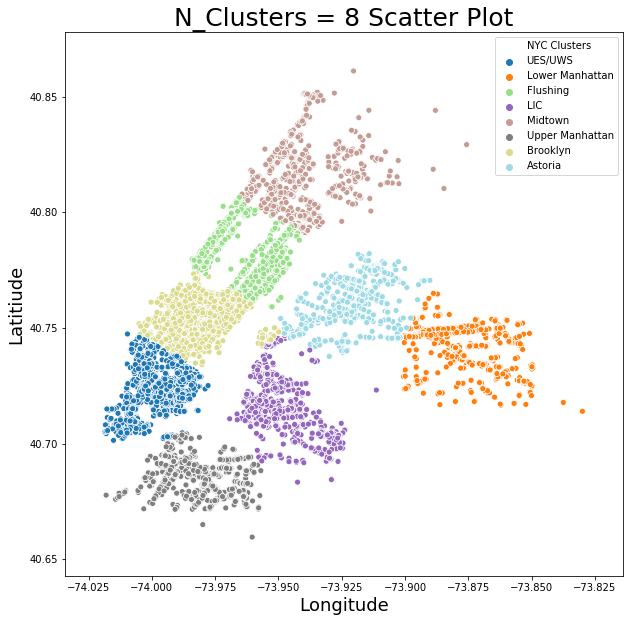

In [208]:
#plot clusters on our map
plt.figure(figsize=(10, 10))
sns.scatterplot(df.longitude, df.latitude, hue=df['clusters'], legend = 'full', palette = "tab20")
plt.title("N_Clusters = 8 Scatter Plot",  fontsize= 25)
plt.ylabel("Latitiude", color = "Black", fontsize= 18)
plt.xlabel("Longitude", color = "Black", fontsize= 18)
L=plt.legend(fontsize = 10)
L.get_texts()[0].set_text('NYC Clusters')
L.get_texts()[1].set_text('UES/UWS')
L.get_texts()[2].set_text('Lower Manhattan')
L.get_texts()[3].set_text('Flushing')
L.get_texts()[4].set_text('LIC')
L.get_texts()[5].set_text('Midtown')
L.get_texts()[6].set_text('Upper Manhattan')
L.get_texts()[7].set_text('Brooklyn')
L.get_texts()[8].set_text('Astoria')

This map shows 8 clusters per example above broken out and labeled based on our subject matter expert of new york. We are able to identify areas based on our subject matter knowledge of the areas of New York. You can see we were able to gather sufficient data from the different bouroughs and will be used in our model. The distinct coloration in our map is the best way to illustrate different areas of New York. 



In [209]:
df.to_csv('datadict.csv', index=False)

We want to create dummy variables for the city column. We believe cities in nyc are a great indicator on whether or not a place is affluent. For example, the affluency of Downtown Bk and Park slope will be much different and are great predictors for affluency

In [210]:
##this functiom takes the 
def lower(anystring):

    return anystring.lower()

In [211]:
df['city'] = df['city'].map(lower)

In [212]:
df['city'].value_counts().head(5)

new york            4607
brooklyn            1525
astoria              561
long island city     224
jackson heights      211
Name: city, dtype: int64

In [213]:
df = pd.concat([df, pd.get_dummies(df['city'])], axis=1)

(15.5, -0.5)

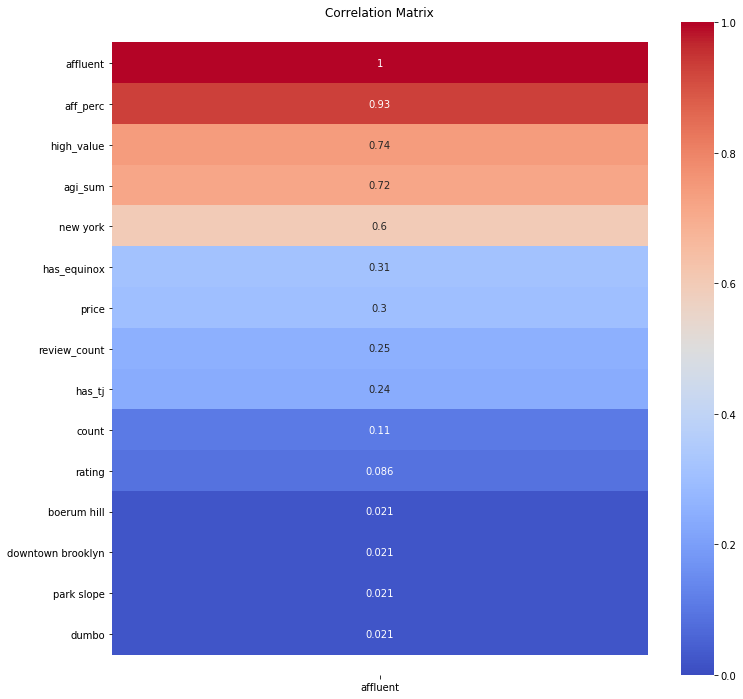

In [214]:
plt.figure(figsize=(12,12))
plt.title("Correlation Matrix")
sns.heatmap(df.corr()[['affluent']].sort_values('affluent', ascending = False).head(15), 
            annot = True, cmap = "coolwarm", vmax = 1, vmin = 0)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 

As expected, the affluency values have the highest correlation with affluency. The price value of yelp is up there too and so is new york. We will drop the affluency measures to avoid leakage within the model. A correlation heat map is great baseline to select features for our model

## Model Preparation

Set up target varible for classification, which is whether or not the zip code is affluent or not. Set up x variables and drop state, id, city, name, categories and all affluent variables. We will set up the train test split to be .33, .67. 

In [215]:
target = df['affluent']
X = df.drop(columns = ['state', 'id', 'city', 'name', 'categories','affluent', 'agi_sum', 'aff_perc', 'high_value', 
                      'latitude', 'longitude', 'zip_codes'])
y = target


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25, stratify = y)

X_train.head()

,review_count,rating,price,count,has_tj,has_equinox,clusters,astoria,bedford-stuyvesant,boerum hill,...,prospect heights,prospect lefferts gardens,queens,red hook,rego park,sunnyside,washington heights,west bronx,williamsburg,woodside
5104,136,4.0,2,377,0,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2623,480,4.0,2,187,0,1,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5650,3,4.5,1,205,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4305,162,4.5,3,88,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2285,445,3.5,2,241,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modeling

### Baseline Model

In [217]:
df['affluent'].value_counts()

1    4298
0    3722
Name: affluent, dtype: int64

In [218]:
df['affluent'].value_counts(normalize = True)

1    0.53591
0    0.46409
Name: affluent, dtype: float64

For classification problems, the one rule is to predict the class value that is most common in the training dataset. This means that the training data set has 53 of the instances in class 1 and 47% of the instances in class 0. Therefore, the baseline accuracy is 53%.

### Model 1:  Logistic Regression

Fit a pipeline logistic regression model based on the x features listed above. We will use PCA to reduce dimensions in order to find the most optimal amount of x features.

In [219]:
log_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('model', LogisticRegression(penalty = 'none', solver = 'lbfgs', random_state= 3479))
])

In [220]:
# What are the parameters?
log_pipe_params = {
    'model__penalty': ['l2'],
    'model__C': [3, 10, 1000]
}

In [221]:
gs_log_pipe = GridSearchCV(estimator = log_pipe,
                       param_grid = log_pipe_params,
                       cv = 5,
                       verbose = 1,
                      n_jobs = 4)
results_log = gs_log_pipe.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    9.7s finished


In [222]:
gs_log_pipe.best_params_

{'model__C': 3, 'model__penalty': 'l2'}

In [223]:
cross_val_score(gs_log_pipe.best_estimator_, X, target, cv= 5).mean()

0.7241527386071486

In [224]:
train_score_log = results_log.best_score_
print('Best TRAIN accuracy: {:.4f}'.format(train_score_log))
test_score_log = results_log.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score_log))

Best TRAIN accuracy: 0.7950
Best TEST set accuracy: 0.7830


We wanted to run a simple logisitic regression and we see that the accuracy score is about 78% on the test data. We ran the ridge penalty and shows that l2 is a good representation of our hyperparamater. We will run more models and compare it back to our logistic regression as logistic regression is easy to interpret. 

### Model 2: KNeighbors

In [225]:
pipe_knn = Pipeline([
    ('sc', StandardScaler(with_mean = False)),
    ('model', KNeighborsClassifier(n_neighbors=10))
])

knn_params = {
    'model__n_neighbors': range(1,10),
    'model__metric': ['manhattan']
}

In [226]:
pipe_knn_gridsearch = GridSearchCV(pipe_knn,
                                knn_params ,
                                cv = 5,
                                scoring='accuracy',
                                verbose=1)

In [227]:
#fit data
results_knn = pipe_knn_gridsearch.fit(X_train, y_train);

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   37.4s finished


In [228]:
#search for best score on fitted data
pipe_knn_gridsearch.best_params_

{'model__metric': 'manhattan', 'model__n_neighbors': 1}

In [229]:
train_score = pipe_knn_gridsearch.best_score_
print('Best TRAIN set accuracy: {:.4f}'.format(train_score))
test_score = pipe_knn_gridsearch.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score))

Best TRAIN set accuracy: 0.9764
Best TEST set accuracy: 0.9741


In [230]:
cross_val_score(pipe_knn_gridsearch.best_estimator_, X, target, cv= 5).mean()

0.8815517673634238


Our knn model does a great job in determining groups based on proximnity(n neighbors). As you can see the accuracy of this model tremendously increased compared to that of the logistic regression. The model does a great job on determining the proximities and this is why it perfroms so well on the testing set. Although there is a major discrepency from the cross val score, we should continue to run further models

### Model 3: Decision Trees

In [231]:
pipe = Pipeline(steps = [ ('sc', StandardScaler()),
                         ('dt',DecisionTreeClassifier(random_state = 42))
                         
                        ])    

# Construct Grid Parameters
hyperparams = {
               
               
            'dt__max_depth': [1000]
                
              }

 # Perform Grid Search
gs_dt = GridSearchCV(pipe, # pipeline object replaces what we usually had as empty model class
                 param_grid=hyperparams,
                 cv = 3,
                 scoring = 'accuracy')

In [232]:
results_decision = gs_dt.fit(X_train, y_train)

In [233]:
train_score_dec = results_decision.best_score_
print('Best TRAIN accuracy: {:.4f}'.format(train_score_dec))
test_score_dec = results_decision.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score_dec))

Best TRAIN accuracy: 0.9945
Best TEST set accuracy: 0.9935


In [234]:
cross_val_score(gs_dt.best_estimator_, X, target, cv= 5).mean()

0.9610915680367433

In [235]:
results_decision.best_params_

{'dt__max_depth': 1000}


Our decision model does a great job in determining groups based on depth of our trees. As you can see the accuracy of this model tremendously increased compared to that of the logistic regression and the knn. The model does a great job on determining the split off points for important features and this is why it perfroms so well on the testing set. The model does perform well on the full dataset, looking at our cross val score, and its easily interpretable. We will test further trees to determine ifwe can achieve a better cross val score.

### Model 4  Bagging

In [236]:
pipe = Pipeline(steps = [ ('sc', StandardScaler()),
                         ('bg',BaggingClassifier(random_state = 42))
                         
                        ])    

# Construct Grid Parameters
hyperparams = {
               
               
                                                        # use a single value that isn't built into
                                                        # the defaults (otw: stopwords left in
               'bg__n_estimators': range(10, 100, 10),
                
              }

 # Perform Grid Search
gs_bg = GridSearchCV(pipe, # pipeline object replaces what we usually had as empty model class
                 param_grid=hyperparams,
                 cv = 3,
                 scoring = 'accuracy')

In [237]:
results_bagging = gs_bg.fit(X_train, y_train)

In [238]:
results_bagging.best_params_

{'bg__n_estimators': 90}

In [239]:
train_score_bag = results_bagging.best_score_
print('Best TRAIN accuracy: {:.4f}'.format(train_score_bag))
test_score_bag = results_bagging.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score_bag))

Best TRAIN accuracy: 0.9947
Best TEST set accuracy: 0.9955


In [240]:
cross_val_score(gs_bg.best_estimator_, X, target, cv= 5).mean()

0.9593698732221574

Our bagging model does a great job in determining groups based on depth of our trees. As you can see the accuracy of this model hardly increased from decision trees. Although the decision trees was not over fit, we wanted to test this model to see if the cross val score improved. This model takes different samples in parallel to find the most optimal set of trees. 

### Model 5: Random Forrest

In [241]:
pipe = Pipeline(steps = [ ('sc', StandardScaler()),
                          ('rf', RandomForestClassifier())
                         
                        ])    

# Construct Grid Parameters
hyperparams = {
               
               
                                                        # use a single value that isn't built into
                                                        # the defaults (otw: stopwords left in
               'rf__n_estimators': [100, 150, 200],
               'rf__max_depth': [None, 1, 2, 3, 4, 5],
}
                
              

 # Perform Grid Search
gs_rf = GridSearchCV(pipe, # pipeline object replaces what we usually had as empty model class
                 param_grid=hyperparams,
                 cv = 3,
                 scoring = 'accuracy')

In [242]:
results_rf= gs_rf.fit(X_train, y_train)

In [243]:
results_rf.best_params_

{'rf__max_depth': None, 'rf__n_estimators': 150}

In [244]:
train_score_rf = results_rf.best_score_
print('Best TRAIN accuracy: {:.4f}'.format(train_score_rf))
test_score_rf = results_rf.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score_rf))

Best TRAIN accuracy: 0.9915
Best TEST set accuracy: 0.9925


In [245]:
cross_val_score(gs_rf.best_estimator_, X, target, cv= 5).mean()

0.9441478694535478

We decided to test random forest. As the accuraacy score was slightly less than bagging and decision trees, the model also regressed on the full data set. This will not be a model we evaluate. 

### Model 6 ADA BOOST

In [246]:
pipe = Pipeline(steps = [ ('sc', StandardScaler()),
                         ('ab',AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))
                         
                        ])    

# Construct Grid Parameters
hyperparams = {
               
               
                                                        # use a single value that isn't built into
                                                        # the defaults (otw: stopwords left in
                'ab__n_estimators': [50,100],
               'ab__base_estimator__max_depth': [1,2],
               'ab__learning_rate': [.9, 1.]
}
                
              

 # Perform Grid Search
gs_ab = GridSearchCV(pipe, # pipeline object replaces what we usually had as empty model class
                 param_grid=hyperparams,
                 cv = 3,
                 scoring = 'accuracy')

In [247]:
results_ab = gs_ab.fit(X_train, y_train)
train_score_ab = results_ab.best_score_
print('Best TRAIN accuracy: {:.4f}'.format(train_score_ab))
test_score_ab = results_ab.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score_ab))

Best TRAIN accuracy: 0.9998
Best TEST set accuracy: 0.9985


In [248]:
results_ab.best_params_

{'ab__base_estimator__max_depth': 2,
 'ab__learning_rate': 1.0,
 'ab__n_estimators': 50}

In [249]:
cross_val_score(gs_ab.best_estimator_, X, target, cv= 5).mean()

0.9907747739343872

This final model of boosting provided the best score with the highest cross val score. It perfromed better than the decision trees and the bagging. The only downside of boosting its a complex and robust model that is hard to interpret.

## Model Selection

In [250]:
score_df = pd.DataFrame(columns = ['Model', 'Train Score', 'Test Score'])

In [251]:
score_df['Model'] = ['Logistic Regression','KNN', 'DecisionTrees', 'Bagging', 'RandomForrest','AdaBoost']

In [252]:
score_df['Train Score'] = [results_log.best_score_,pipe_knn_gridsearch.best_score_, results_decision.best_score_,
                     results_bagging.best_score_, results_rf.best_score_, results_ab.best_score_]

In [253]:
score_df['Train Score'] = [round(x,4) for x in score_df['Train Score']]

In [254]:
score_df['Test Score'] = [results_log.score(X_test, y_test),pipe_knn_gridsearch.score(X_test, y_test), results_decision.score(X_test, y_test),
                     results_bagging.score(X_test, y_test), results_rf.score(X_test, y_test),results_ab.score(X_test, y_test)]

In [255]:
score_df['Test Score'] = [round(x,4) for x in score_df['Test Score']]

In [256]:
score_df['Variance'] = score_df['Test Score'] - score_df['Train Score']

In [257]:
score_df

,Model,Train Score,Test Score,Variance
0,Logistic Regression,0.7950,0.7830,-0.0120
1,KNN,0.9764,0.9741,-0.0023
2,DecisionTrees,0.9945,0.9935,-0.0010
3,Bagging,0.9947,0.9955,0.0008
4,RandomForrest,0.9915,0.9925,0.0010
5,AdaBoost,0.9998,0.9985,-0.0013


### Best Predictive Model: 

Of all 6 models, we have decided that the stronget predictive model is the Decision Trees Model. Based on our metric listed in the problem statement, the Decision Trees gave us the highest testing accuracy score of .9985. To further test our model, we ran a cross validation score on that model and there was a slight discrepency between our cross val and testing score. We believe knn does well in this model because it reperesents distance and we are looking at specific locations where we can deploy disaster recovery plans in less affluent areas. 

### Model to Interpret:

Logistic Regression, based on our problem, is the most optimal model for interpretation and generalization on deploying the model on different cities. As you can see through our feature selection, we dropped zip_codes, latitude and longitude in order to make our model more general. Logistic Regression also shows the full scope of all features and its effect in classifying whether a city is affluent or not. This will allow our client to examine the coeficients and deploy the model on different cities, and add features to improve the testing and train score. Logistic Regression does a slightly better job than decision trees of showing the full scope of all our features instead of just the most important features. This is why we want to illustrate coeficients. Our models scored so high because of how specific our model is to NYC and this should be a discretion when deploying on other cities. To use this on other zip codes we have to ensure to dummify city columns in order to predict affluency or not

## Model Evaluation

### Best Predictive Model: Decision Tree Interpretation

In [258]:
dt_results = gs_dt.best_estimator_.named_steps["dt"].feature_importances_
df_feature_importance = pd.DataFrame(list(zip(X_test.columns.values, dt_results)), 
               columns=['features', 'Feature_Importance'])

df_feature_importance =  df_feature_importance.sort_values(by = 'Feature_Importance', ascending = False).head(10)

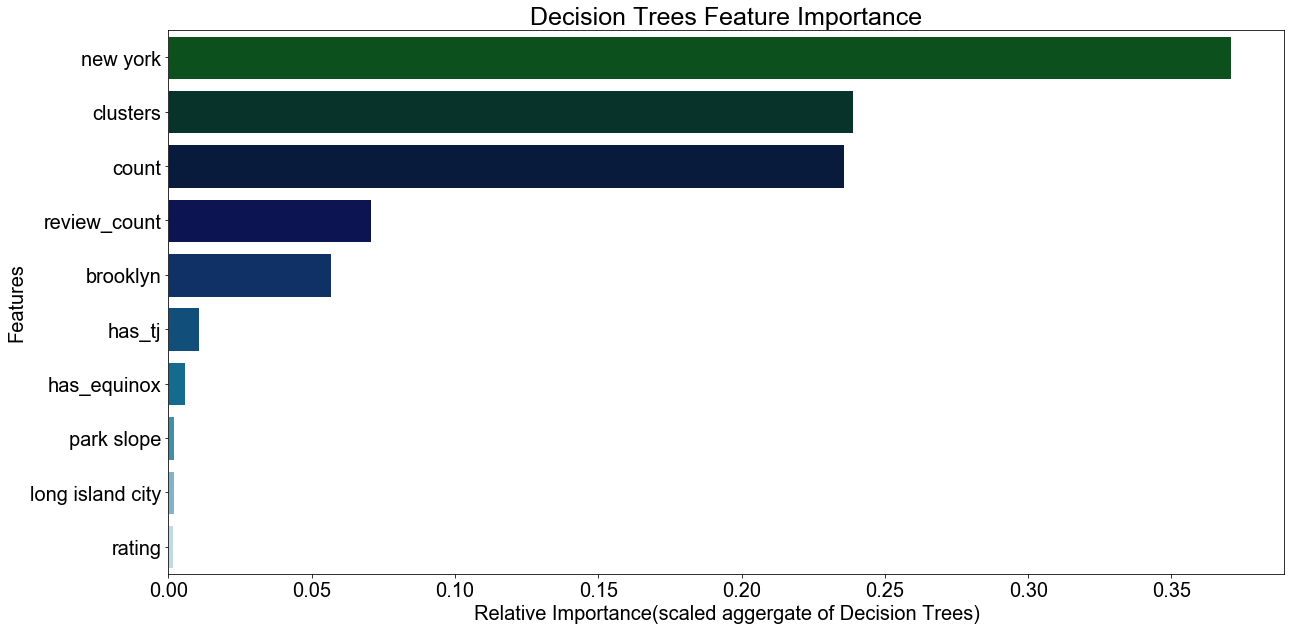

In [259]:
plt.figure(figsize=(20,10))
plt.title('Decision Trees Feature Importance',fontsize=25)
sns.set_style("darkgrid")
sns.barplot(data=df_feature_importance ,x='Feature_Importance',y='features',orient='h',palette='ocean')
plt.xlabel('Relative Importance(scaled aggergate of Decision Trees)',fontsize=20)
plt.ylabel(('Features'),fontsize=20)
plt.tick_params(labelsize=20)


After running a Decision Tree model using the most important features to classify our model, we are able to determine which featues are prioritized in our decision trees. As you can see from the illustration above, new york and our clusters top off the important features, in addition the count frequency of the businesses. Another feature to note is our engineered feature of has traders joes. This shows that a traders joes in a certain location is extremely important in classifying affluency. Something to that is noteworthy for our client is that price is not as important as certain clusters and areas of the city. This could indicate that yelp price does not really have a major influence on classifying affluency or not.

### Decision Trees Confusion Matrix

In [277]:
def pretty_confusion_matrix(y_true, y_pred):
    # handling data
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Non-Affluent(0)', 'Affluent(1)']
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
    sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu",xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    
   

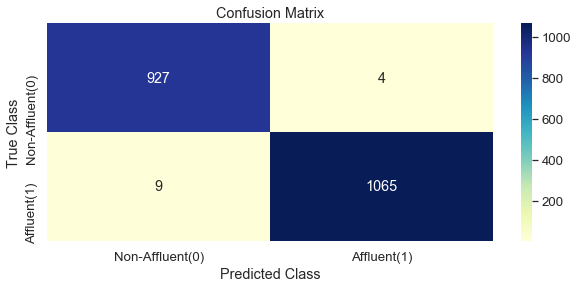

In [278]:
pretty_confusion_matrix(y_test, results_decision.predict(X_test))

##### __Analysis of Confusion Matrix:__

The confusion matrix is a great illustration that shows the amount of predictions classifed properly and the amount of predictions missclassified. We can use this to calculate different metrics, such as accuracy, true positive and true negative rate. We can dive deeper into the classes missclassifed to see which features are causing the missclassification.

__Positive Class__

- Affluent : 1

__Negative Class__

- Non Affluent : 0

__Totals:__

- Total Predictions = 2,005

- True Positives = 1065

- True Negatives =  927

- False Positives = 4

- False Negatives = 9


__Scoring:__


- Accuracy Score =  .998

- Miscclasifcation Score = .002

- Sensitivity =  .998 (TP/TP + FN)

- Specificity = .998  (TN/TN + TP)


Our metric is accuracy and our model performs extremely well in terms of classifying true values. Another metric to focus on is to minimize specificy so because we do not want our client to focus thier deployment of disaster recovery plans to affluent areas that were deemed to be non affluent. For example, we want to ensure that we dont deploy a strategy in an affluent area if we predicted it to be non affluent.


### Decision Trees Visual

In [262]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)
opt_dt = DecisionTreeClassifier()
opt_dt.fit(X_train, y_train)

tree_file = export_graphviz(
                opt_dt, 
                out_file=None,
                feature_names=X.columns, 
                filled=True, 
                rounded=True,
                class_names = ["not affluent","affluent"],
                max_depth = 3,
                special_characters=True)

graphviz.Source(tree_file)
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

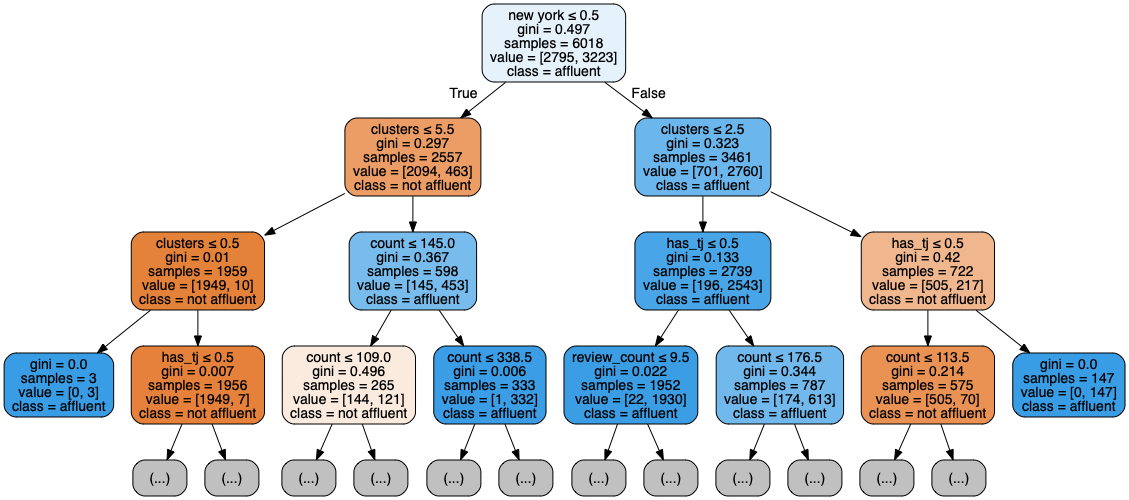

We have created above a visualisation of our DecisionTree model. At each node, our model chooses to branch off by using the biggest decrease in the Gini impurity score. The visualisation assigns warmer tones to the prediction of "less affluent" and cool tones to the "more affluent" predictions. A gini impurity of 0.0 means that the respective node is pure.

In the image above, the cluster 'New York" is shown to be the most important feature in determining the affluence of a specific zip code. The next feature that has an importance in order to determine affluence is the 'clusters' value - for clusters with a value under 2.5, and then the next feature that would predict the affluence of a zip code is "has_tj" (has trader joe). The purest results are observed on that branch to be darker blue - where the review_count of that specific zip code is under 9.5.

We can see that we have small gini scores in both the cold and warm cells - that only means that the features in the warmer tone cells predict less affluence of the zip code tested.

We notice that the best way to predict the lessa fluence of an area is to see if the cluster number is under 5.5, and with a count of businesse under 109, regardless if the are has a trader joes or not. CLearly this is in interesting finding - as it indicates that zip codes with under 109 business recorded by Yelp are the least affluent in New York City.

### Model To Interpret: Logistic Regression

__We will use 5 evaluation tools to dive deeper into the model I selected__

1)Models Best Paramaters

2)Testing Accuracy Score

3)Confusion Matrix

4)Coeficients

5)ROC Curve

### Models Best Paramaters(GridSearch)

In [263]:
results_log.best_params_

{'model__C': 3, 'model__penalty': 'l2'}

### Models Testing Accuracy score

In [264]:
train_score = results_log.best_score_
print('Best TRAIN set accuracy: {:.4f}'.format(train_score))
test_score = results_log.score(X_test, y_test)
print('Best TEST set accuracy: {:.4f}'.format(test_score))

Best TRAIN set accuracy: 0.7950
Best TEST set accuracy: 0.7830


### Models Confusion Matrix

In [265]:
def pretty_confusion_matrix(y_true, y_pred):
    # handling data
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Non-Affluent(0)', 'Affluent(1)']
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
    sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu",xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t)
    

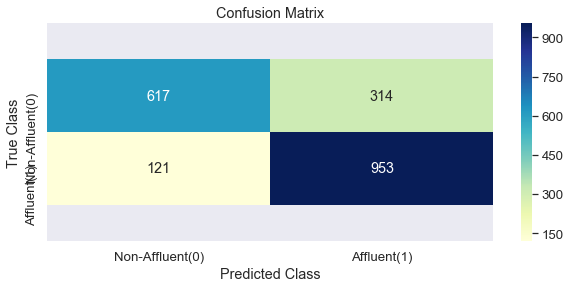

In [266]:
pretty_confusion_matrix(y_test, results_log.predict(X_test))

##### Analysis of Confusion Matrix:

The confusion matrix is a great illustration that shows the amount of predictions classifed properly and the amount of predictions missclassified. We can use this to calculate different metrics, such as accuracy, true positive and true negative rate. We can dive deeper into the classes missclassifed to see which features are causing the missclassification.

__Positive Class__

- Affluent : 1

__Negative Class__

- Non Affluent : 0

__Totals:__

- Total Predictions = 2,007

- True Positives = 1055

- True Negatives =  810

- False Positives = 314

- False Negatives = 121


__Scoring:__


- Accuracy Score =  .78

- Miscclasifcation Score = .22

- True Positive Rate =  .75(TP/TP + FN)

- True Negative Rate =  .83(TN/TN + TP)


### Model Coeficients

In [267]:
##list the coeficients and concat into data frame
df_coef = pd.DataFrame(list(zip(X_test.columns.values, results_log.best_estimator_.steps[1][1].coef_.ravel())), 
               columns=['features', 'coefficient'])
df_coef = df_coef.sort_values(by = 'coefficient', ascending = False)


In [268]:
df_upper = df_coef.head(10)
df_upper

,features,coefficient
38,new york,1.802442
11,brooklyn,0.589435
2,price,0.485056
6,clusters,0.394270
0,review_count,0.297236
3,count,0.235125
19,downtown brooklyn,0.229750
39,park slope,0.218577
20,dumbo,0.201534
12,brooklyn heights,0.193715


In [269]:
df_lower = df_coef.tail(10).sort_values('coefficient', ascending = False)
df_lower

,features,coefficient
36,maspeth,-0.363146
43,queens,-0.367116
46,sunnyside,-0.412710
45,rego park,-0.495124
17,corona,-0.515452
50,woodside,-0.549349
10,bronx,-0.657248
23,elmhurst,-0.841046
33,jackson heights,-0.854870
7,astoria,-1.622325


In [270]:
df_coef = pd.concat([df_upper, df_lower])

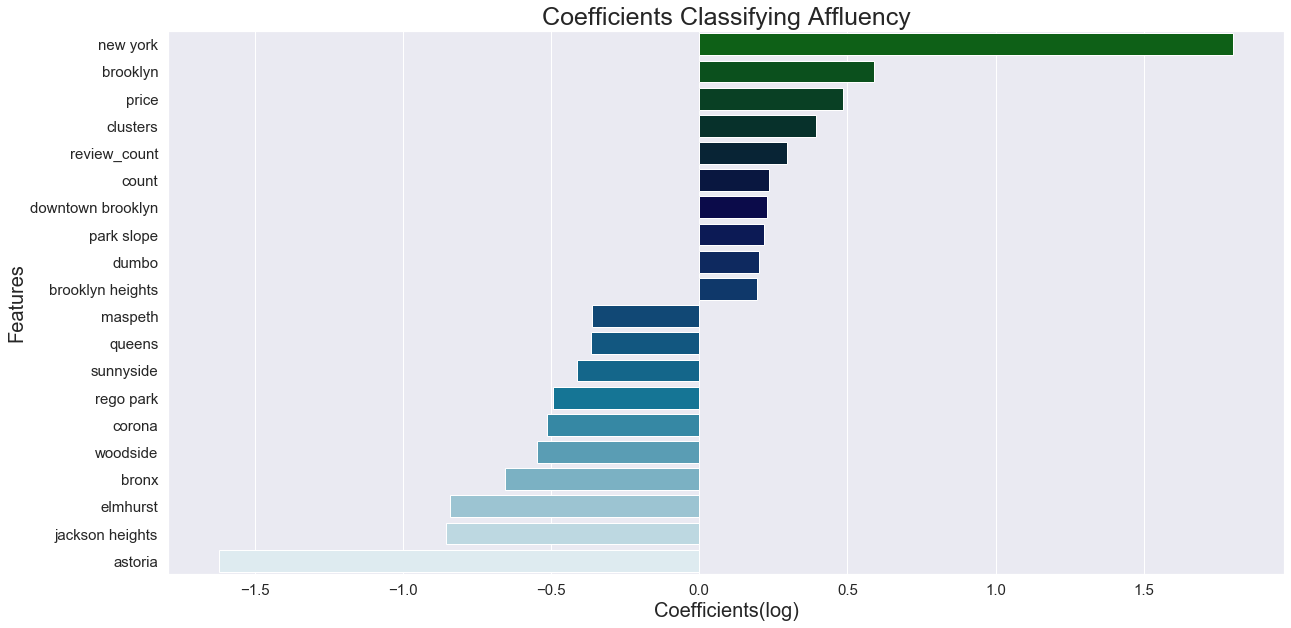

In [271]:
plt.figure(figsize=(20,10))
plt.title('Coefficients Classifying Affluency',fontsize=25)
sns.set_style("darkgrid")
sns.barplot(data=df_coef ,x='coefficient',y='features',orient='h',palette='ocean')
plt.xlabel('Coefficients(log)',fontsize=20)
plt.ylabel(('Features'),fontsize=20)
plt.tick_params(labelsize=15)

__Analysis of Coeficients__

The main reason why we chose to interpret logistic regression is because the coeficients show a broader scope of the relationships of X features to the target variable, in this case affluency. Although decision trees had the best score, Decision trees only show the most important features, but fails to show the relationships of all x variables.  For a unit increase in the feature price , the log-odds of the classification being an affluent neighborhood increases by beta_1 = .47 units. For a unit increase in the feature being Astoria, the log-odds of the classification being affluency decreases by  beta_1 = -1.5 units. We wanted to illustrate the top 10 coeficients for classifying the positve and negative class. This will help our client use this as a baseline for deploying it on other cities. For example, if our client wants to use this model on Los Angeles, they can dummify the cities and see which cities can better affluency. 

### ROC/AUC Curve

In [272]:
pred_proba = [i[1] for i in results_log.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})
pred_df

,true_values,pred_probs
6801,1,0.887005
4754,1,0.376034
921,0,0.358100
2697,1,0.670966
6588,0,0.015291
...,...,...
6616,0,0.014794
2030,1,0.768154
6599,0,0.012961
5976,0,0.000371


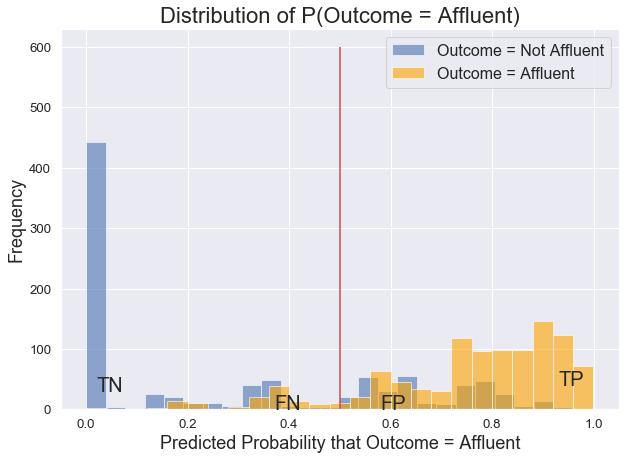

In [273]:
##adopted from global lecture
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Outcome = Not Affluent')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Outcome = Affluent')

plt.vlines(x = .5,
           ymin = 0,
           ymax = 600,
           color = 'r',
           linestyle = '-')


# Label axes.
plt.title('Distribution of P(Outcome = Affluent)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = Affluent', fontsize = 18)

plt.annotate(xy = (0.02, 30),
             s = 'TN',
             size = 20)
plt.annotate(xy = (0.37, 0),
             s = 'FN',
             size = 20)
plt.annotate(xy = (0.58, 0),
             s = 'FP',
             size = 20)
plt.annotate(xy = (0.93, 40),
             s = 'TP',
             size = 20)

# Create legend.
plt.legend(fontsize = 16);

__Analysis of Probability Distribution__

This distribution will show our client the true positives, true negatives, false positives, and false negatives and the frequencies of each probability

1 Positive class(Affluent)


0 Negative Class(Not Affluent)



- True Positive:
    - Items we correctly predict to be positive(affluent class).
    - The orange bars (actual `1`) that are to the right of the red line (predicted `1`).
- True Negative: 
    - Items we correctly predict to be negative(non affluent class).
    - The blue bars (actual `0`) that are to the left of the red line (predicted `0`).
- False Positive:
    - Items we incorrectly predict to be positive(predicted to be affluent but was actually non affluent.)
    - The blue bars (actual `0`) that are to the right of the red line (predicted `1`).
- False Negative: 
    - Items we incorrectly predict to be negative (predicted to be non affluent but was actually affluent).
    - The orange bars (actual `1`) that are to the left of the red line (predicted `0`).
    
    
##Analysis adopted from global lesson 4.02

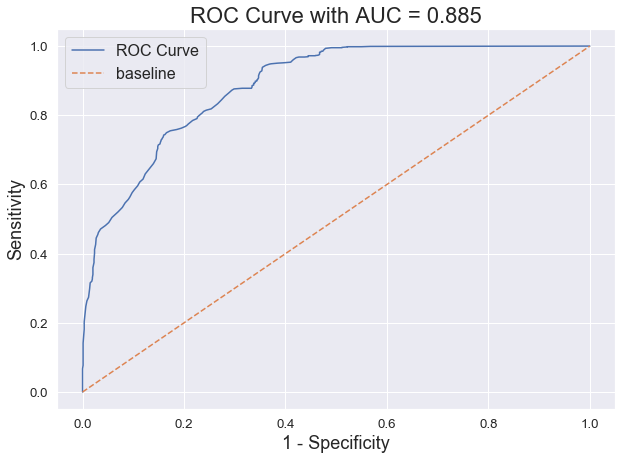

In [274]:
##adopted from global lecture
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

__Analysis of ROC Curve__


If you have an ROC AUC of 1, your positive and negative populations are perfectly separated and your model and this is a perfect model. Our ROC AUC of .93 indicates that our postive and negative populations are 93% seperated by our logistic regression model. Our goal with deploying a model is to build a model that has no overlap between the orange and blue histograms shown on our probability distribution. The ROC AUC curve illustrates the amount of overlap that exists between our distribution. Our model scores so high because it is extremely specific in NYC and gives us the exact cities of everywhere in New York. We were extremely successful in scraping percise points in NYC and was able to gather various cities in New York that reperesent affluency. To further improve the deployment of this model on other cities, we want to make sure that this model covers a more general basis. Therefore, we reccommend that when using it on another city, that the data collection process includes specific areas of the city and dummified city columns. 

## Conclusion

We were tasked to asses if the Yelp classification would indicate the affluence of an area. Our conclusion is that the yelp price is not a very important feature when we try to asses the affluence of an area in New York City. In our opinion, the most important feature that we have observed was the neighborhood itself - and its location in the whole New York City. That is obvious from the fact that 'clusters' - our engineered feature based on 8 locations in New York City - is the second most important, after the "New York" feature - in predicting affluency.

We notice that the presence of a good gorcery store - such as Trader Joes, which we have used in our model - is also a relatively good feature in predicting of how affluent a zone is.

The number of reviews a business has is also showing higher importance than the ' $ price' - and interstingly enough - another one of our engineered features perfoms way better then the 'price' one at predicting afluency - namedly - "count" - which is the number of businesses per zip code. It makes sense that more affluent areas have more businesses, and the also have a better exposure to customers, and therefore would have more reviews.

An interesting finding was that the zip codes of New York City with under 109 businesses tend to be the least affluent ones in the city as shown in our decision tree analysis. This is an extremely important finding - as a model such as this, adjusted for various USA cities, could indicate needier areas in cases of natural disasters.

In conclusion, our model, although not preforming with the price feature as a key feature as it would have been expected, can still be used by engineering features like the ones we designed, customized to each specific city, to predict the least affluent regions and therefore be used in extreme situations to deply help where the most needed.

## Recommendations

As a general conclusion, location and the engineered features were better predictors than the yelp price - so we would reccomend out client to aggregate more data in order to asses the affluence of a specific region with more accuracy. Yelp $ price alone is not enough.

A caveat to our results - we have used this model only on New York City - and this model would perform differently on other cities.

A further step would be to apply this model to other densely populated cities of United States, and to smaller ones as well, and compare the results. It would be interesting to explore the diffreneces needed in moedls used for densely populated areas, and the sparsley populated ones, and explore those differences.